Importing Libraries

In [59]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

Loading the Dataset


In [4]:
df=pd.read_csv('train.csv')

Exploring Dataset

In [5]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
df.describe

<bound method NDFrame.describe of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Te

In [60]:
df.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

In [61]:
# Data preprocessing
# Replace 0 with 'M' and 1 with 'F' in the gender column
df['gender'] = df['gender'].replace({0: 'M', 1: 'F'})

EDA

In [64]:

df.isnull().sum()


gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [13]:
mean_salary = df['salary'].mean()             #Imputation
df['salary'].fillna(mean_salary, inplace=True)

In [63]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Dropping Unnecessary Columns

In [15]:
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 

In [16]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


Text(0.5, 1.0, 'Secondary School Percentage')

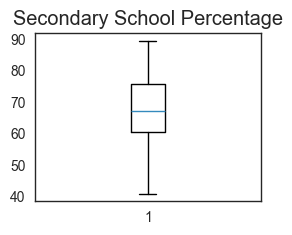

In [65]:
# Creating subplots for each boxplot
ax1 = plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax1.set_title('Secondary School Percentage')

Text(0.5, 1.0, 'Higher Secondary School Percentage')

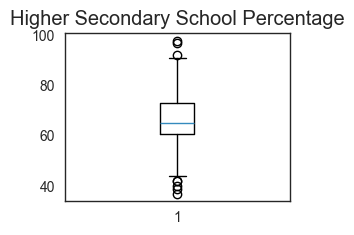

In [66]:
ax2 = plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax2.set_title('Higher Secondary School Percentage')

Text(0.5, 1.0, 'UG Degree Percentage')

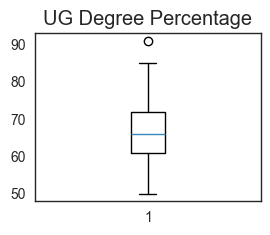

In [67]:
ax3 = plt.subplot(223)
plt.boxplot(df['degree_p'])
ax3.set_title('UG Degree Percentage')

Text(0.5, 1.0, 'Employability Percentage')

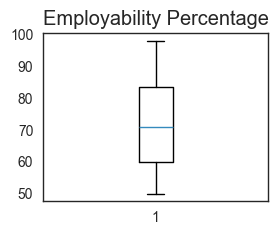

In [68]:
ax4 = plt.subplot(224)
plt.boxplot(df['etest_p'])
ax4.set_title('Employability Percentage')

Checking for Outliers


In [70]:
# Outlier detection and removal
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 * IQR)
df_filtered = df.loc[filter]

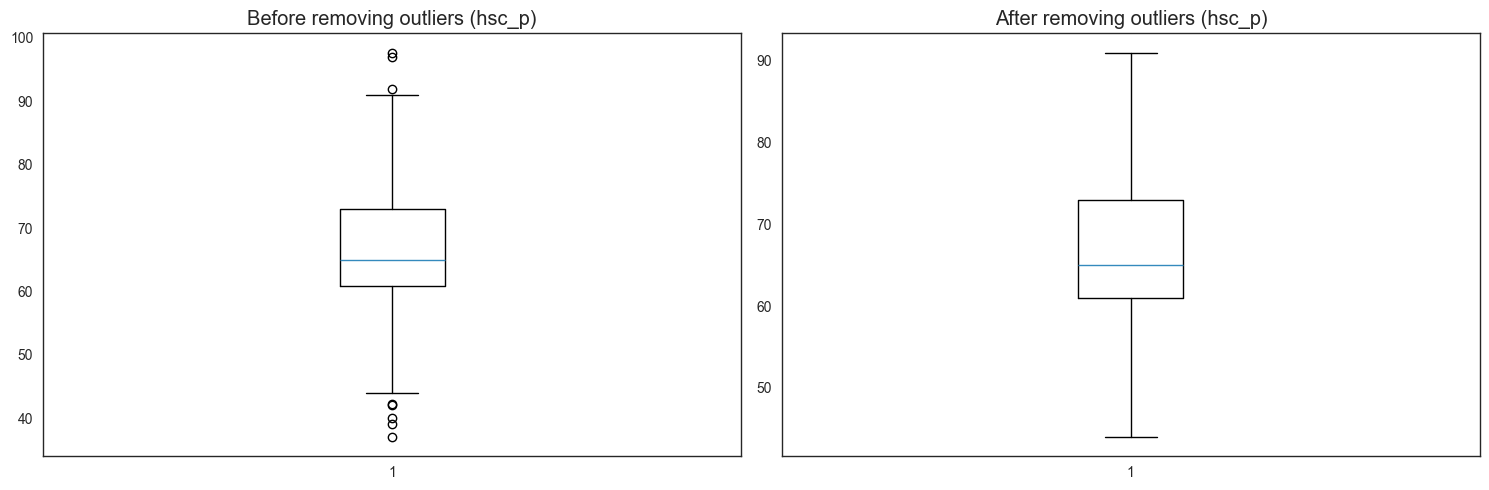

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn


# Set the seaborn style
sns.set_style('white')

plt.figure(figsize=(15, 5))

# Creating subplots for each boxplot
ax1 = plt.subplot(121)
plt.boxplot(df['hsc_p'])
ax1.set_title('Before removing outliers (hsc_p)')

ax2 = plt.subplot(122)
plt.boxplot(df_filtered['hsc_p'])
ax2.set_title('After removing outliers (hsc_p)')

plt.tight_layout()  # To adjust spacing between subplots
plt.show()  # Display the plots


VISUALIZATION

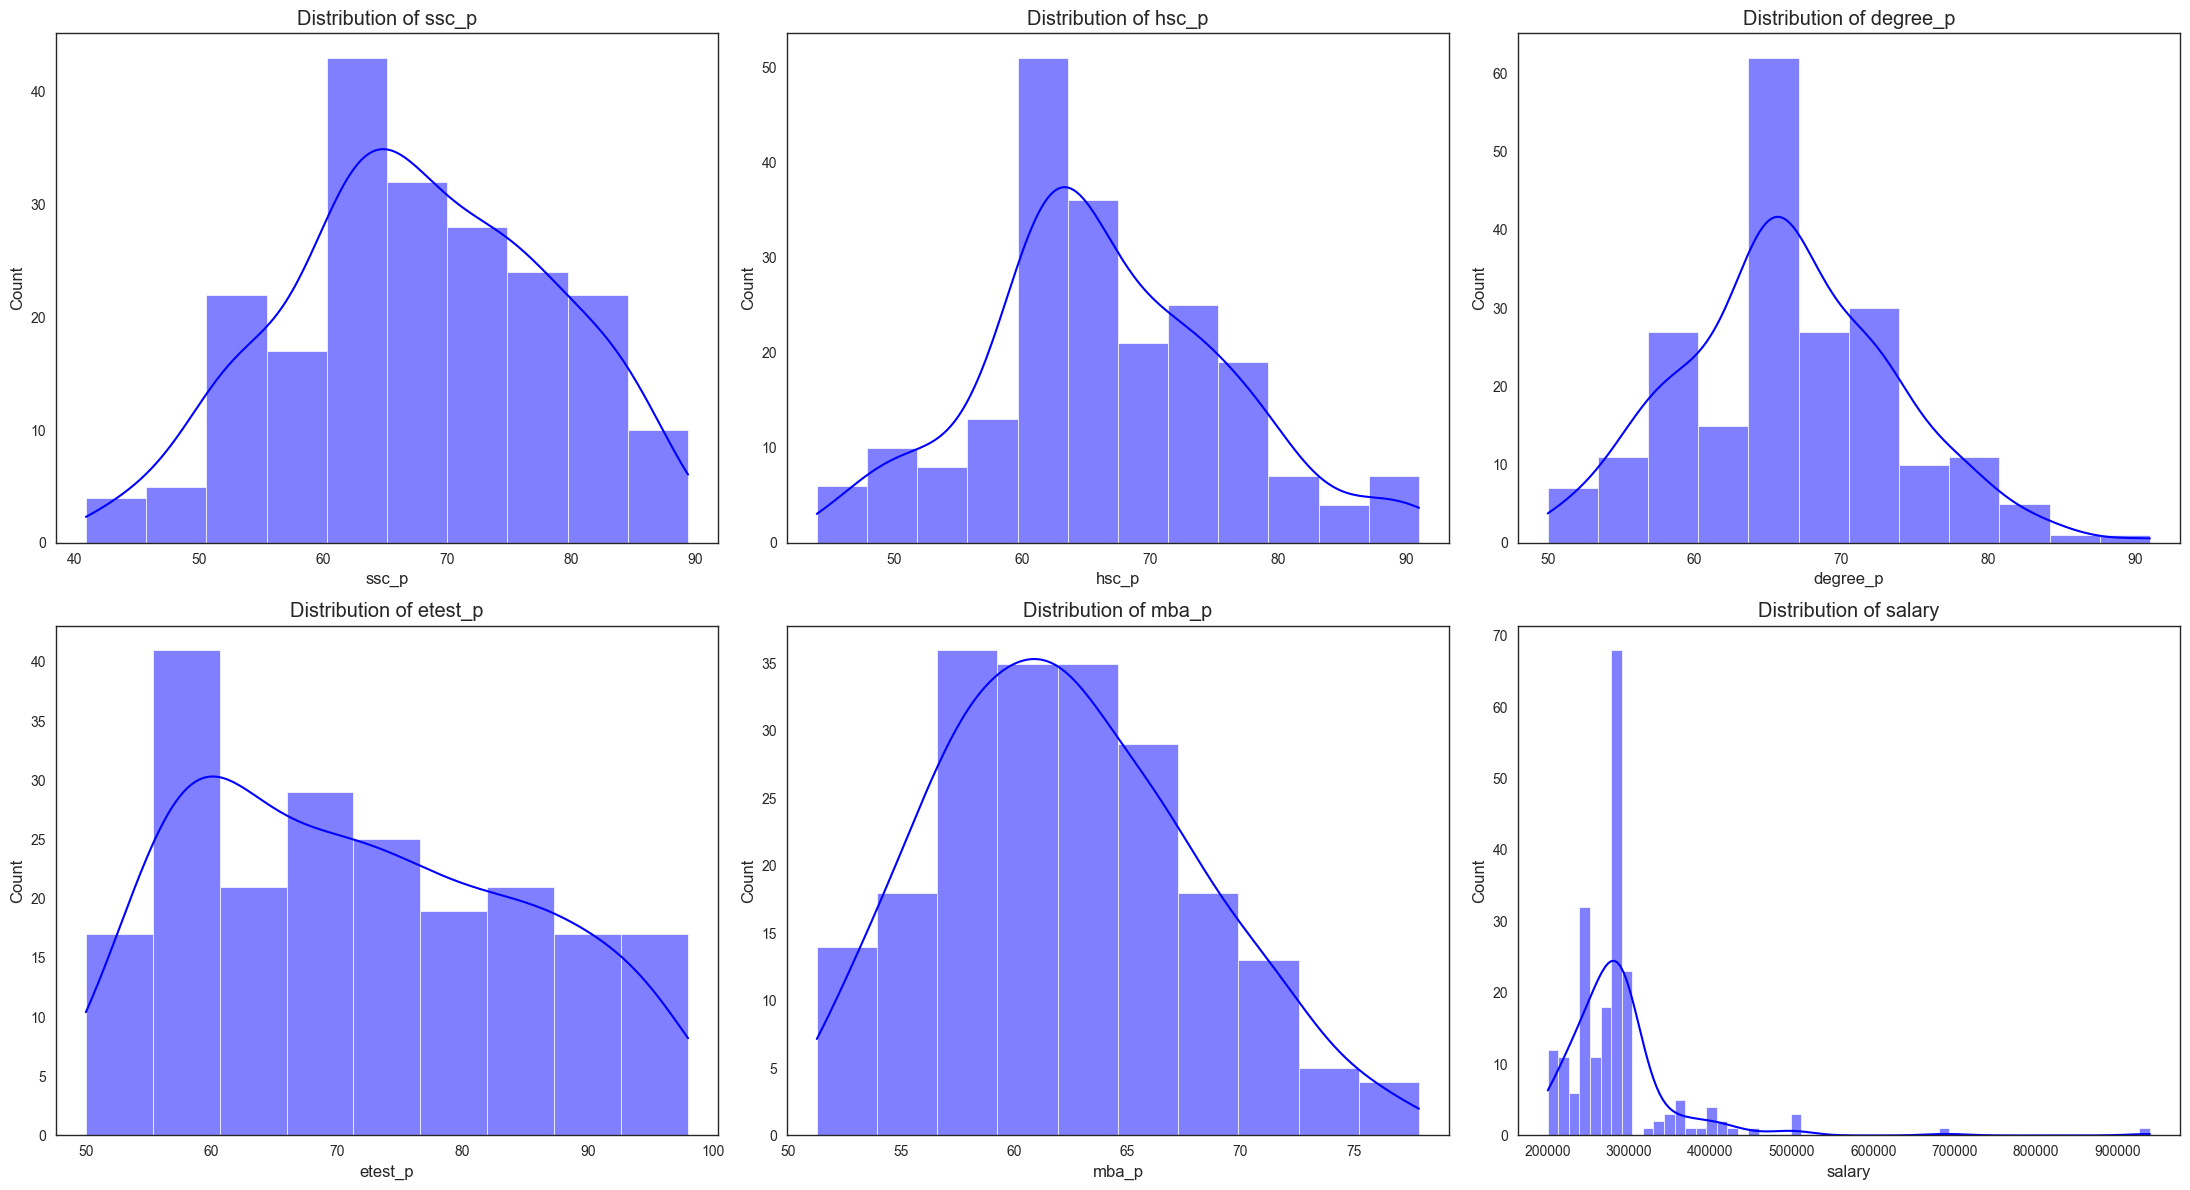

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

plt.figure(figsize=(22, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_filtered[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
#Multivarient Analysis

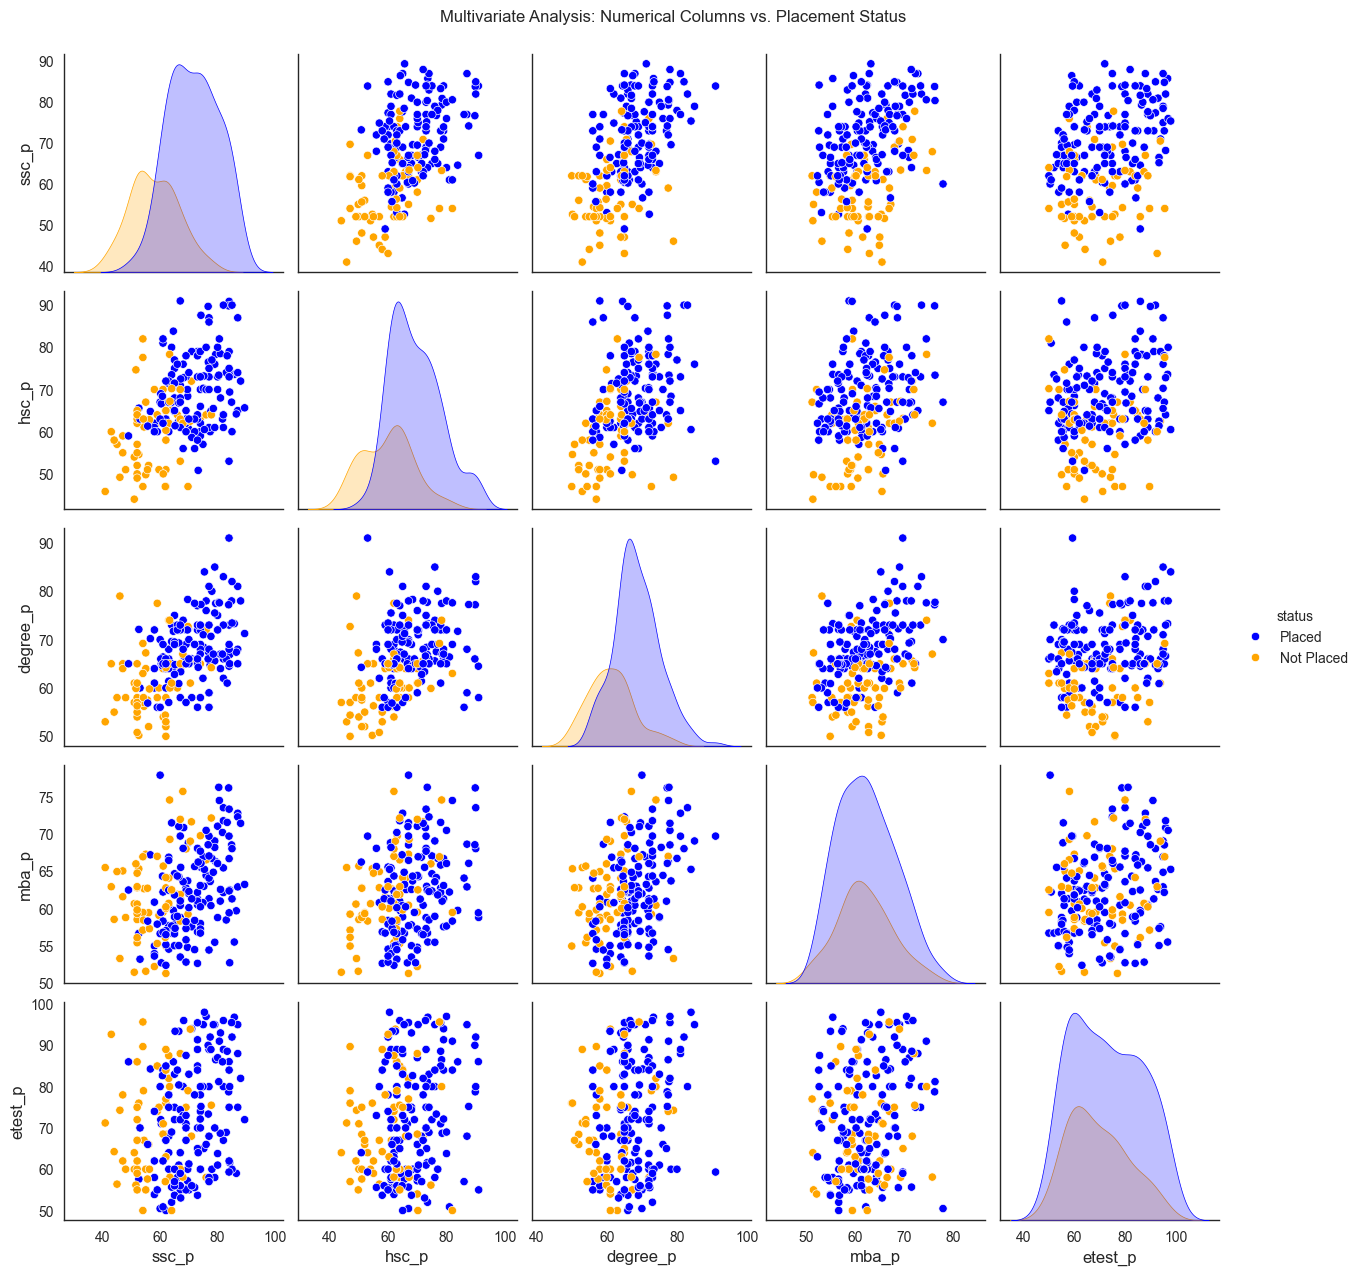

In [25]:
# Select numerical columns (excluding 'salary') for multivariate analysis       #there Are use in paire plot graph
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']

# Pairplot to visualize relationships between numerical columns based on 'status'
sns.pairplot(df_filtered, hue='status', vars=numerical_columns, diag_kind='kde', palette={'Placed': 'blue', 'Not Placed': 'orange'})
plt.suptitle('Multivariate Analysis: Numerical Columns vs. Placement Status', y=1.02)
plt.show()

In [26]:

numeric_columns = df_filtered.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

In [27]:

numeric_columns.head(3)   

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0


In [28]:
 correlation_matrix 

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.475307,0.525069,0.270586,0.356633,0.012274
hsc_p,0.475307,1.000000,0.385139,0.209656,0.293159,-0.016105
degree_p,0.525069,0.385139,1.000000,0.204103,0.377094,-0.062200
etest_p,0.270586,0.209656,0.204103,1.000000,0.207157,0.131680
mba_p,0.356633,0.293159,0.377094,0.207157,1.000000,0.118141
salary,0.012274,-0.016105,-0.062200,0.131680,0.118141,1.000000


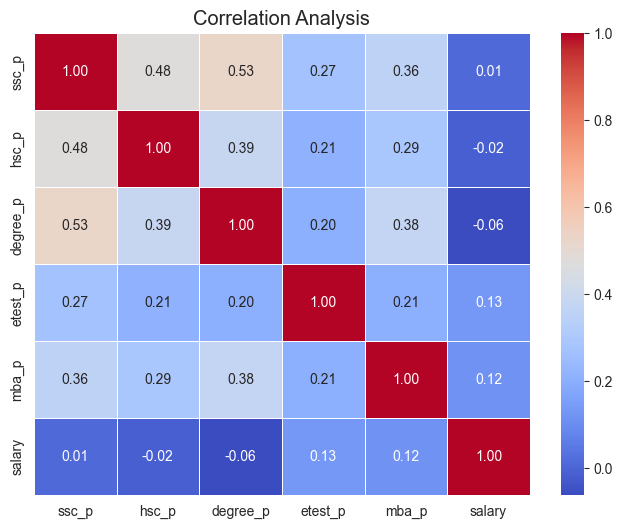

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Analysis")
plt.show()

In [30]:
#Hypothesis Generation
# Convert 'Placed' and 'Not Placed' to numeric values
df_filtered['status'] = df_filtered['status'].map({'Placed': 1, 'Not Placed': 0})

# Extract numerical columns
numeric_columns = df_filtered[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'status']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation with placement status
status_correlation = correlation_matrix['status'].drop('status')
print(status_correlation)

ssc_p       0.586772
hsc_p       0.451068
degree_p    0.461029
etest_p     0.116030
mba_p       0.034205
salary     -0.016729
Name: status, dtype: float64


C:\Users\regmi\AppData\Local\Temp\ipykernel_18844\551675440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['status'] = df_filtered['status'].map({'Placed': 1, 'Not Placed': 0})


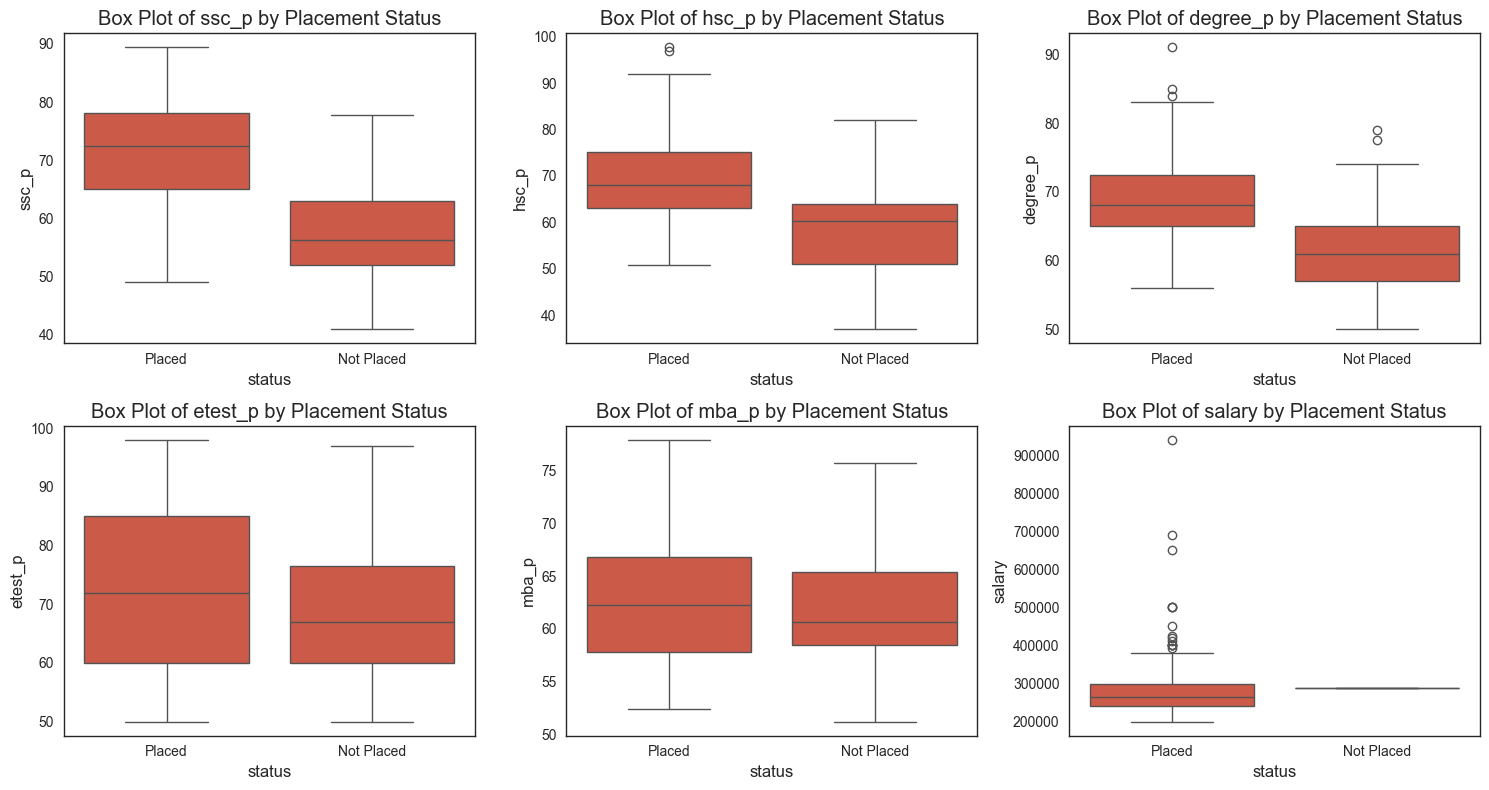

In [31]:
# Box plots for numerical columns
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=column, data=df)
    plt.title(f'Box Plot of {column} by Placement Status')

plt.tight_layout()
plt.show()

Preprocessing data for classficiation models

Label Encoding


In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']
label_encoder = LabelEncoder()
# Apply label encoder to each column with categorical data

for col in object_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
df_filtered.head()


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.000000
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.000000
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.000000
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,288655.405405
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.000000


Model Training and evaluation

One Hot Encoding

In [34]:
dummy_hsc_s=pd.get_dummies(df_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(df_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([df_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


In [35]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

In [36]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [77]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [78]:
# Load or prepare your dataset
# Assuming you have your features and target variable
X = placement_coded.drop('status', axis=1)  # Features
y = placement_coded['status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (144, 14)
Input Test: (63, 14)
Output Training: (144,)
Output Test: (63,)


In [80]:
# Initialize models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

In [81]:

# Train each model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

In [82]:
# Predict using the test set
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

In [83]:


# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Logistic Regression Accuracy: 0.7936507936507936
Random Forest Accuracy: 0.8888888888888888
SVM Accuracy: 0.8412698412698413
KNN Accuracy: 0.8095238095238095
Decision Tree Accuracy: 0.7936507936507936
Naive Bayes Accuracy: 0.7936507936507936


In [84]:
from sklearn.ensemble import VotingClassifier

# Define a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr_model), 
    ('rf', rf_model), 
    ('dt', dt_model)], voting='hard')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')


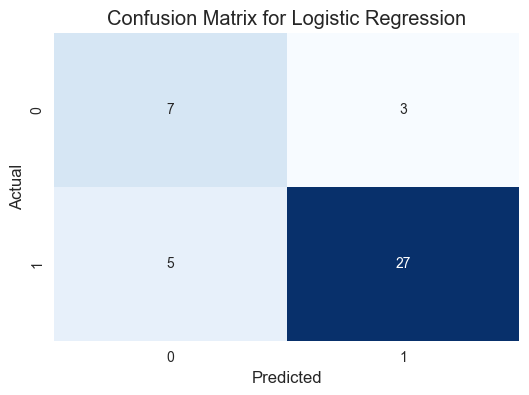

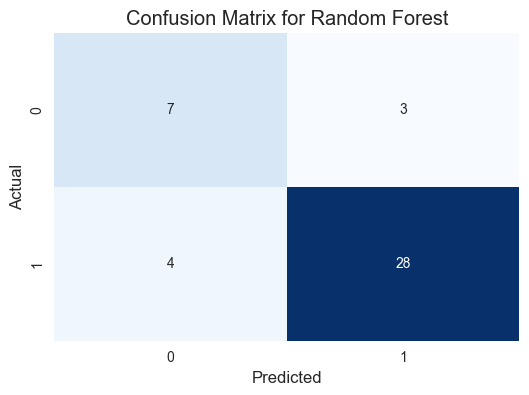

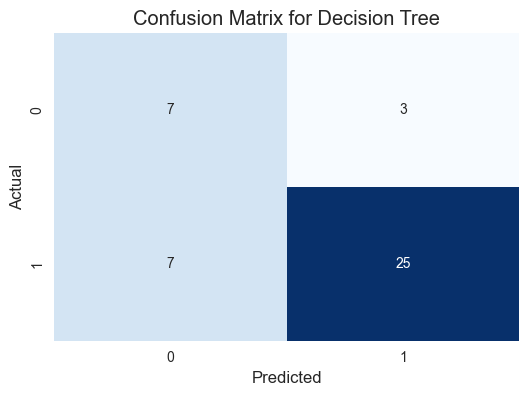

In [56]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = confusion_matrix(y_test, model.predict(X_test))
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for Logistic Regression, Random Forest, and Decision Tree
plot_confusion_matrix(lr_model, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")
plot_confusion_matrix(dt_model, X_test, y_test, "Decision Tree")

# Assuming you have defined a Voting Classifier 'voting_clf', if not, you'll need to define it first
# plot_confusion_matrix(voting_clf, X_test, y_test, "Voting Classifier")


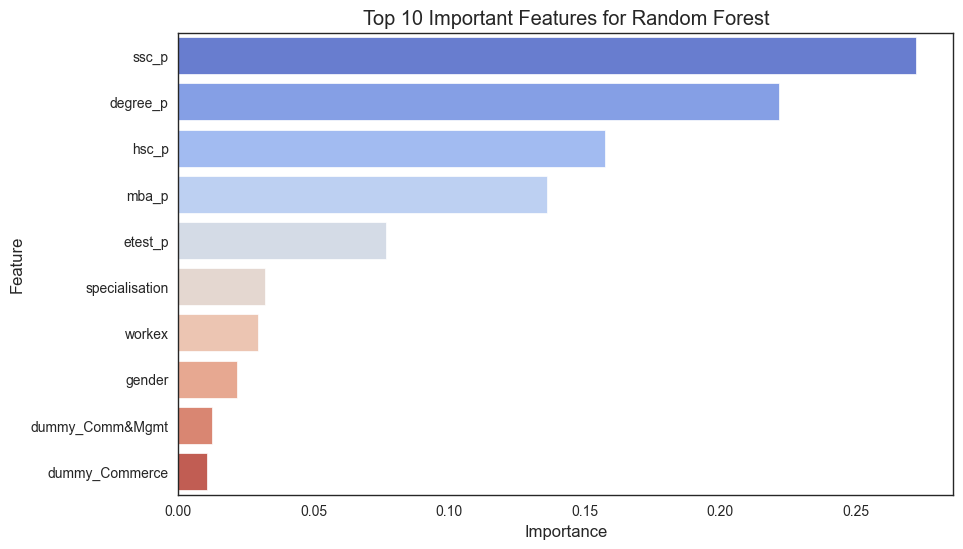

In [54]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('Top 10 Important Features for Random Forest')
plt.show()


                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression  0.809524   0.900000  0.84375  0.870968
1        Random Forest  0.833333   0.903226  0.87500  0.888889
2        Decision Tree  0.761905   0.892857  0.78125  0.833333
3    Voting Classifier  0.833333   0.878788  0.90625  0.892308


<Axes: title={'center': 'Model Performance Comparison'}, xlabel='Model'>

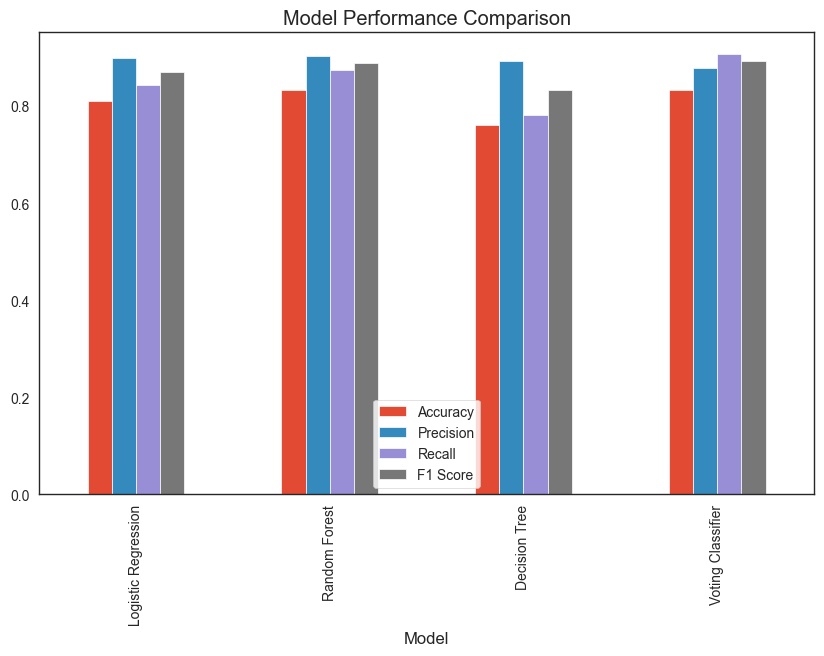

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a DataFrame to store model performance
performance_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Voting Classifier'],
    'Accuracy': [
        accuracy_score(y_test, lr_model.predict(X_test)),
        accuracy_score(y_test, rf_model.predict(X_test)),
        accuracy_score(y_test, dt_model.predict(X_test)),
        accuracy_score(y_test, voting_clf.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, lr_model.predict(X_test)),
        precision_score(y_test, rf_model.predict(X_test)),
        precision_score(y_test, dt_model.predict(X_test)),
        precision_score(y_test, voting_clf.predict(X_test))
    ],
    'Recall': [
        recall_score(y_test, lr_model.predict(X_test)),
        recall_score(y_test, rf_model.predict(X_test)),
        recall_score(y_test, dt_model.predict(X_test)),
        recall_score(y_test, voting_clf.predict(X_test))
    ],
    'F1 Score': [
        f1_score(y_test, lr_model.predict(X_test)),
        f1_score(y_test, rf_model.predict(X_test)),
        f1_score(y_test, dt_model.predict(X_test)),
        f1_score(y_test, voting_clf.predict(X_test))
    ]
}

performance_df = pd.DataFrame(performance_data)

# Display the DataFrame
print(performance_df)

# Plot the performance comparison (optional)
performance_df.plot(x='Model', kind='bar', figsize=(10, 6), title='Model Performance Comparison')
